In [1]:
# Import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
%matplotlib inline

In [2]:
# Import df
df = pd.read_csv("./data/clean_data.csv")
df.head(5)

,Case ID,Complaint Received Type,Country,Province/State,Fraud and Cybercrime Thematic Categories,Solicitation Method,Gender,Language of Correspondence,Victim Age Range,Complaint Type,Number of Victims,Dollar Loss,Date
0,1,CAFC Website,Canada,Saskatchewan,Merchandise,Other/unknown,NaN,NaN,NaN,Attempt,0,0.00,2021-01-02
1,2,CAFC Website,NaN,NaN,Merchandise,Internet,NaN,NaN,NaN,Victim,1,1000.00,2021-01-02
2,3,CAFC Website,Canada,Quebec,Identity Fraud,Other/unknown,Male,French,'40 - 49,Victim,1,0.00,2021-01-02
3,4,CAFC Website,Canada,Saskatchewan,Phishing,Email,Male,English,'30 - 39,Victim,1,0.00,2021-01-02
4,5,CAFC Website,Canada,Saskatchewan,Merchandise,Other/unknown,Male,NaN,'60 - 69,Victim,1,222.73,2021-01-02


In [3]:
df["Date"] = pd.to_datetime(df["Date"])

# 1. Cyber attack trend (2021-2025)

C:\Users\USER\AppData\Local\Temp\ipykernel_2856\2695848359.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.set_index("Date").resample("M").size()


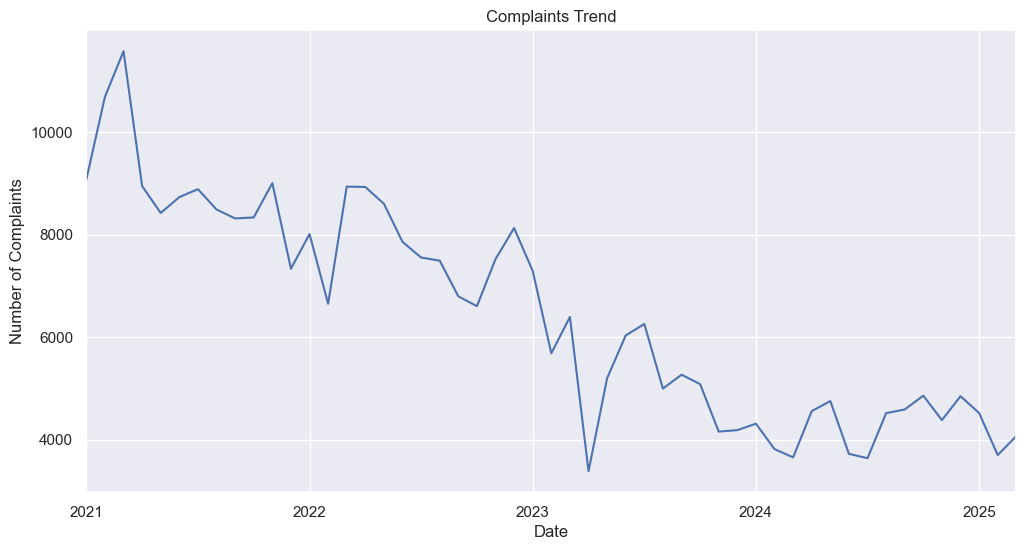

<Figure size 640x480 with 0 Axes>

In [4]:
# Trends
df_monthly = df.set_index("Date").resample("M").size()

plt.figure(figsize=(12,6))
df_monthly.plot()
plt.title("Complaints Trend")
plt.xlabel("Date")
plt.ylabel("Number of Complaints")
plt.grid(True)
plt.show()
plt.savefig("./figs/attacks_trend.png")

**Notes:**
- The number of complaints has decreased substantially since 2021. Actually, it has been reduced by more than 50% within 4 years.
- During begining of 2021 the number of complaints hit the maximum for this 4 year period.

# Seasonality of the attacks
Are there any months where attacks become more occurent? 

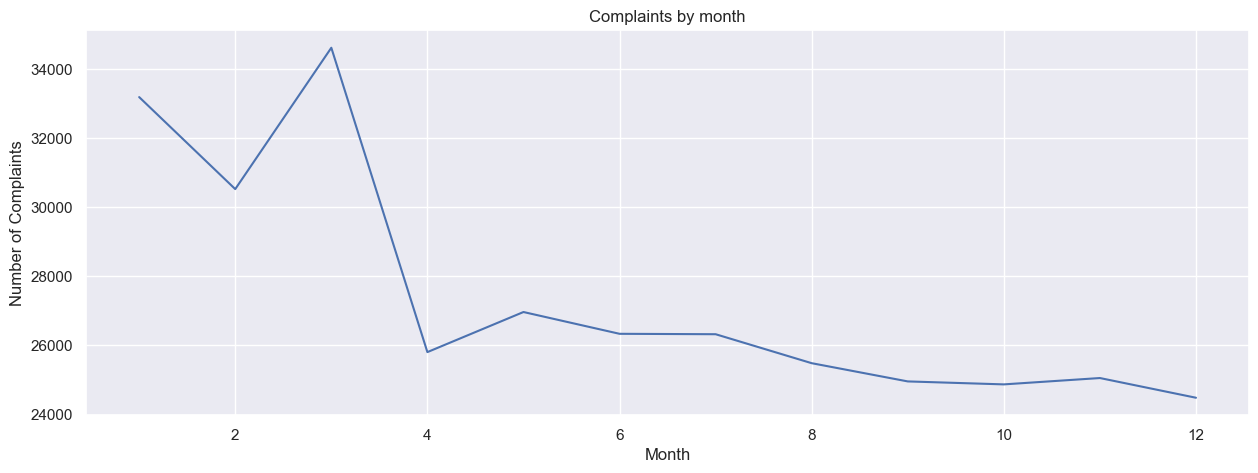

<Figure size 640x480 with 0 Axes>

In [5]:
df["Month"] = df["Date"].dt.month
df_grouped_monthly = df.groupby("Month").size()


plt.figure(figsize=(15,5))
df_grouped_monthly.plot(kind = "line")
plt.title("Complaints by month")
plt.xlabel("Month")
plt.ylabel("Number of Complaints")
plt.grid(True)
plt.show()
plt.savefig("./figs/attacks_seasonality.png")

**Notes:**
- Apparently during the firsts months there are more complaints than the rest of the year.
- This may be due to the maximum hit during first months of 2021, let's explore by year and see if there exists seasonality.

<Figure size 1500x500 with 0 Axes>

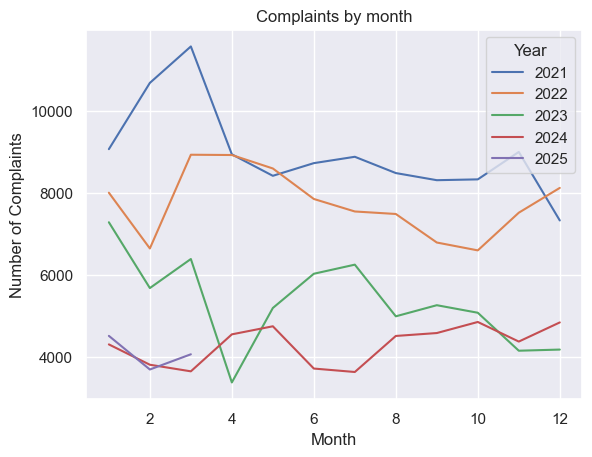

<Figure size 640x480 with 0 Axes>

In [6]:
# Let's explore by year
df["Year"] = df["Date"].dt.year
df_grouped_monthly = df.groupby(["Month", "Year"]).size().unstack(level = 1)


plt.figure(figsize=(15,5))
df_grouped_monthly.plot(kind = "line")
plt.title("Complaints by month")
plt.xlabel("Month")
plt.ylabel("Number of Complaints")
plt.grid(True)
plt.show()
plt.savefig("./figs/attacks_seasonality_2.png")

**Notes:**
- No clear seasonality pattern observed.

# Most common frauds
What is the most common fraud? 

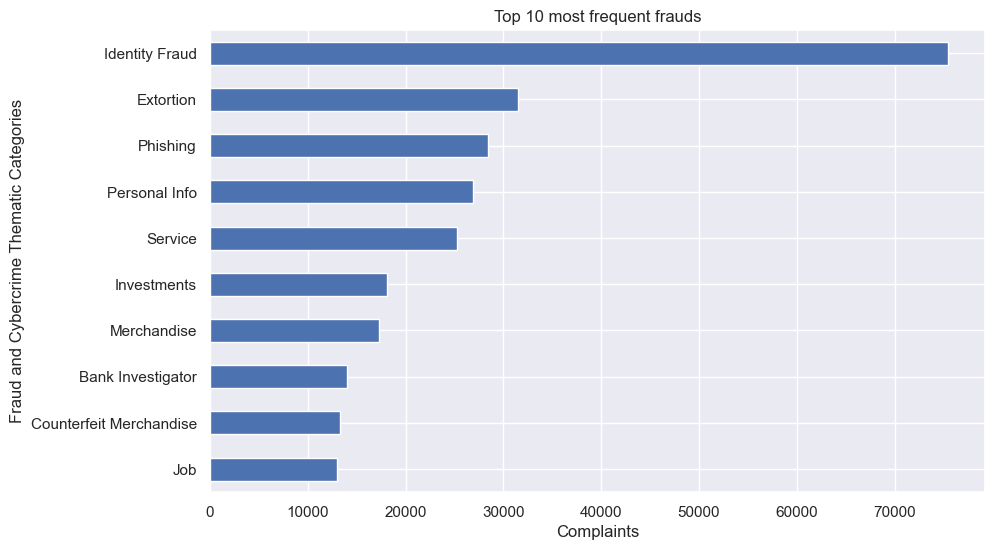

<Figure size 640x480 with 0 Axes>

In [7]:
plt.figure(figsize=(10,6))
df['Fraud and Cybercrime Thematic Categories'].value_counts().nlargest(10).plot(kind='barh')
plt.title("Top 10 most frequent frauds")
plt.xlabel("Complaints")
plt.gca().invert_yaxis()
plt.show()
plt.savefig("./figs/top_10_frauds.png")

**Notes:**
- Identity Fraud is by far, the most common way of fraud, followed by exrtortion and phishing.

# Economic loss per Fraud Type
What type of attack can produce more economic loss for the victim

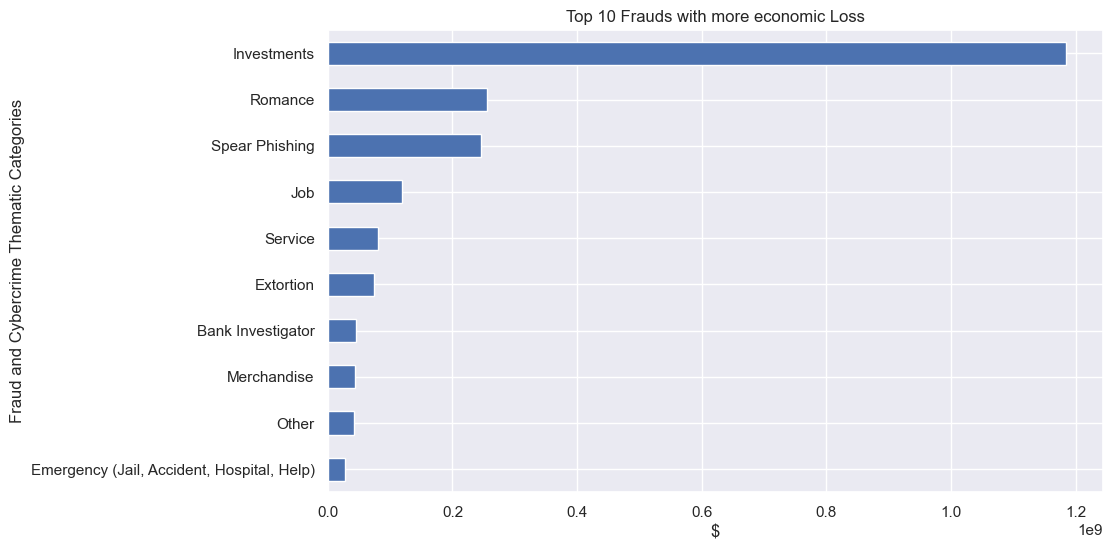

<Figure size 640x480 with 0 Axes>

In [8]:
losses = df.groupby('Fraud and Cybercrime Thematic Categories')['Dollar Loss'].sum().sort_values(ascending=False).head(10)
losses.plot(kind='barh', figsize=(10,6))
plt.title("Top 10 Frauds with more economic Loss")
plt.xlabel("$")
plt.gca().invert_yaxis()
plt.show()
plt.savefig("./figs/losses_by_fraud.png")

**Notes:**
- Although not even in the top 5 most occurrent frauds, investment fraud is by far the most dangerous fraud in economic terms. Vast majority of all monetary losses during these 4 years, have been incurreed in Investment frauds. 
- Nonetheless, it is mentioned in the data source that most of identity fraud cases show a 0$ loss because it is either inaccurate or impossible to report. SInce we have seen that is the most common report, maybe we would see a different pattern if we were able to capture the losses associated accurately.

Let's keep exploring and check for averages.

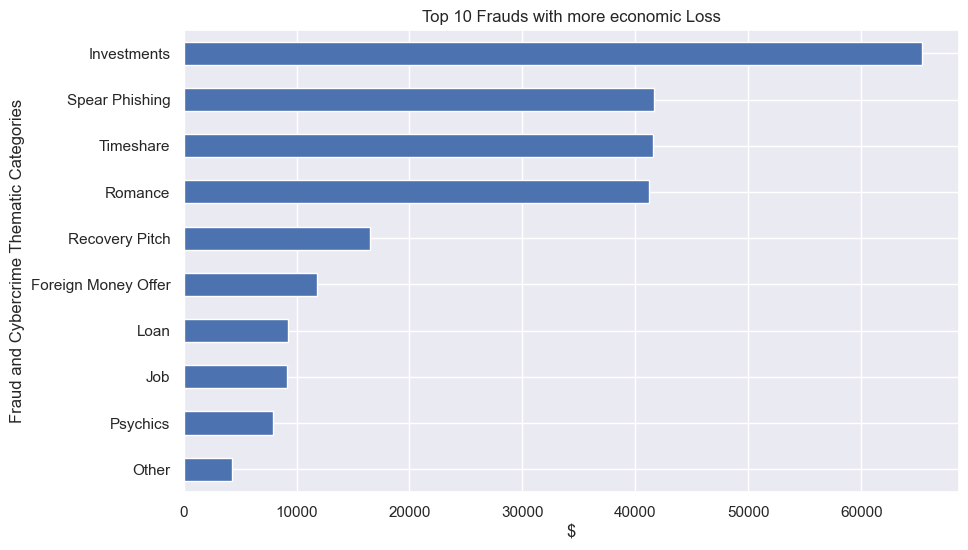

<Figure size 640x480 with 0 Axes>

In [9]:
losses = df.groupby('Fraud and Cybercrime Thematic Categories')['Dollar Loss'].mean().sort_values(ascending=False).head(10)
losses.plot(kind='barh', figsize=(10,6))
plt.title("Top 10 Frauds with more economic Loss")
plt.xlabel("$")
plt.gca().invert_yaxis()
plt.show()
plt.savefig("./figs/avg_losses_by_fraud.png")

**Notes:**
- The average dollar loss implications for an investment fraud is +60k, followed by Spear Phishing, Timeshare and Romance frauds, which on average involve +40k dollar loss. 


# Attacks by country
Where the attackers operate? 


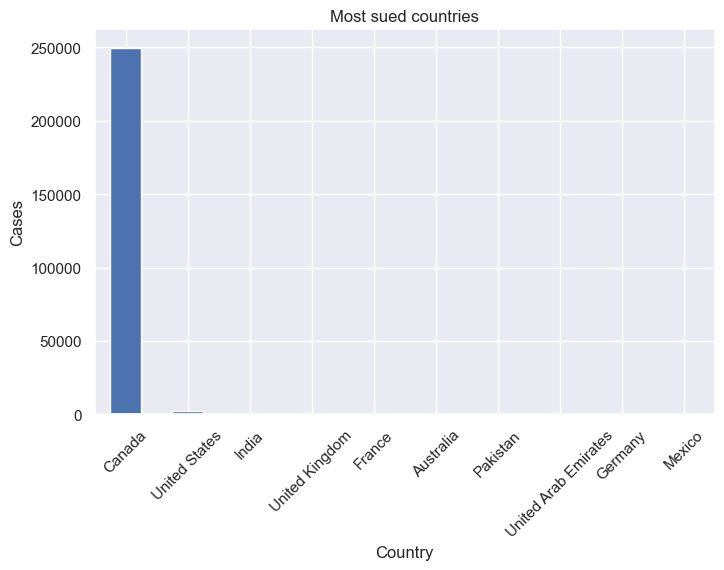

<Figure size 640x480 with 0 Axes>

In [10]:
df['Country'].value_counts().nlargest(10).plot(kind='bar', figsize=(8,5))
plt.title("Most sued countries")
plt.ylabel("Cases")
plt.xticks(rotation=45)
plt.show()
plt.savefig("./figs/countries.png")

**Notes:**
- This figure indicates that most of reported cyber attacks are originated in Canada. Let's explore by state.

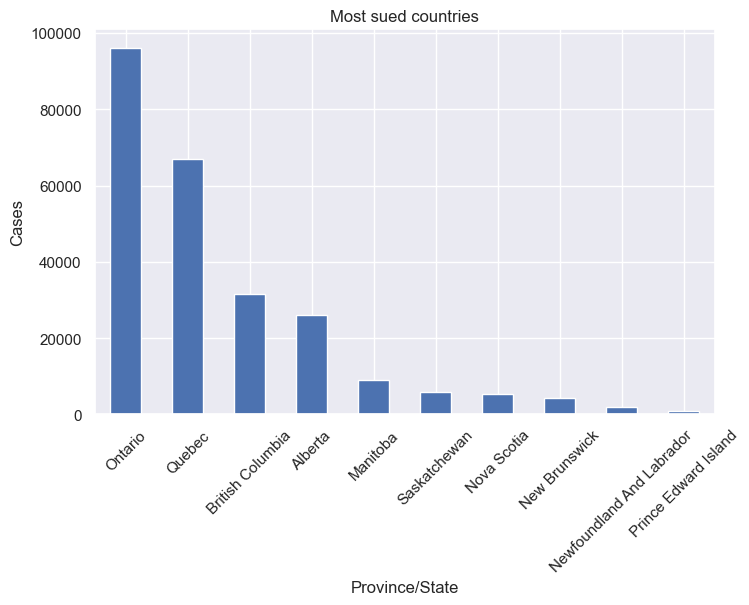

<Figure size 640x480 with 0 Axes>

In [11]:
df['Province/State'].value_counts().nlargest(10).plot(kind='bar', figsize=(8,5))
plt.title("Most sued countries")
plt.ylabel("Cases")
plt.xticks(rotation=45)
plt.show()
plt.savefig("./figs/estates.png")

**Notes:**
- Ontario and Quebec are the states where most of the attacks occur. Might be related to population living in those areas.

# Attacks by gender and age

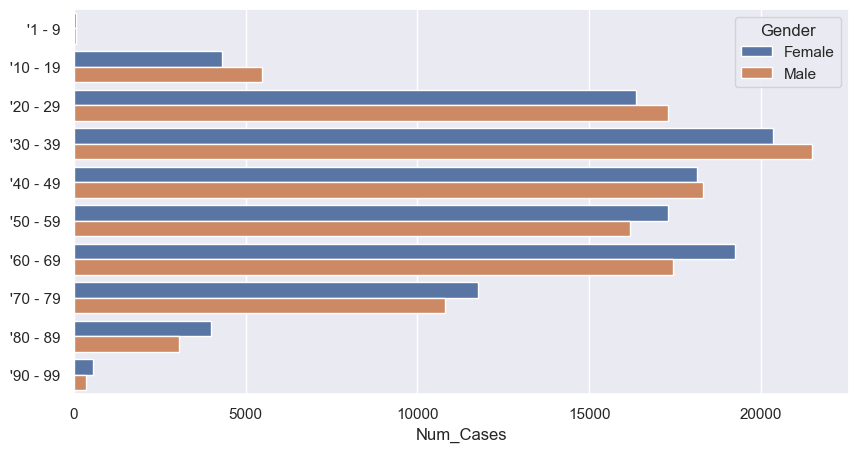

In [12]:
df_clean = df[~df['Victim Age Range'].isin(["'100 +", "'Business / Entreprise", "'Deceased / Décédé"])]
df_clean = df_clean[df_clean['Gender'].isin(['Male', 'Female'])]
age_gender_counts = df_clean.groupby(['Victim Age Range', 'Gender']).size().reset_index(name = "Num_Cases")
plt.figure(figsize=(10,5))
ax = sns.barplot(data=age_gender_counts, x="Num_Cases", hue="Gender", y="Victim Age Range")
ax.set(ylabel="")
plt.savefig("./figs/attacks_gender_age.png")

**Notes:**
- Males in their 30s is the most affected group, followed by females in the same age range. 
- There is a concentration of attacks to people aged betweeen 20 and 69. These attacks might be happening because they rely more on technology, which makes them more accessible or vulnerable, something to be proven.

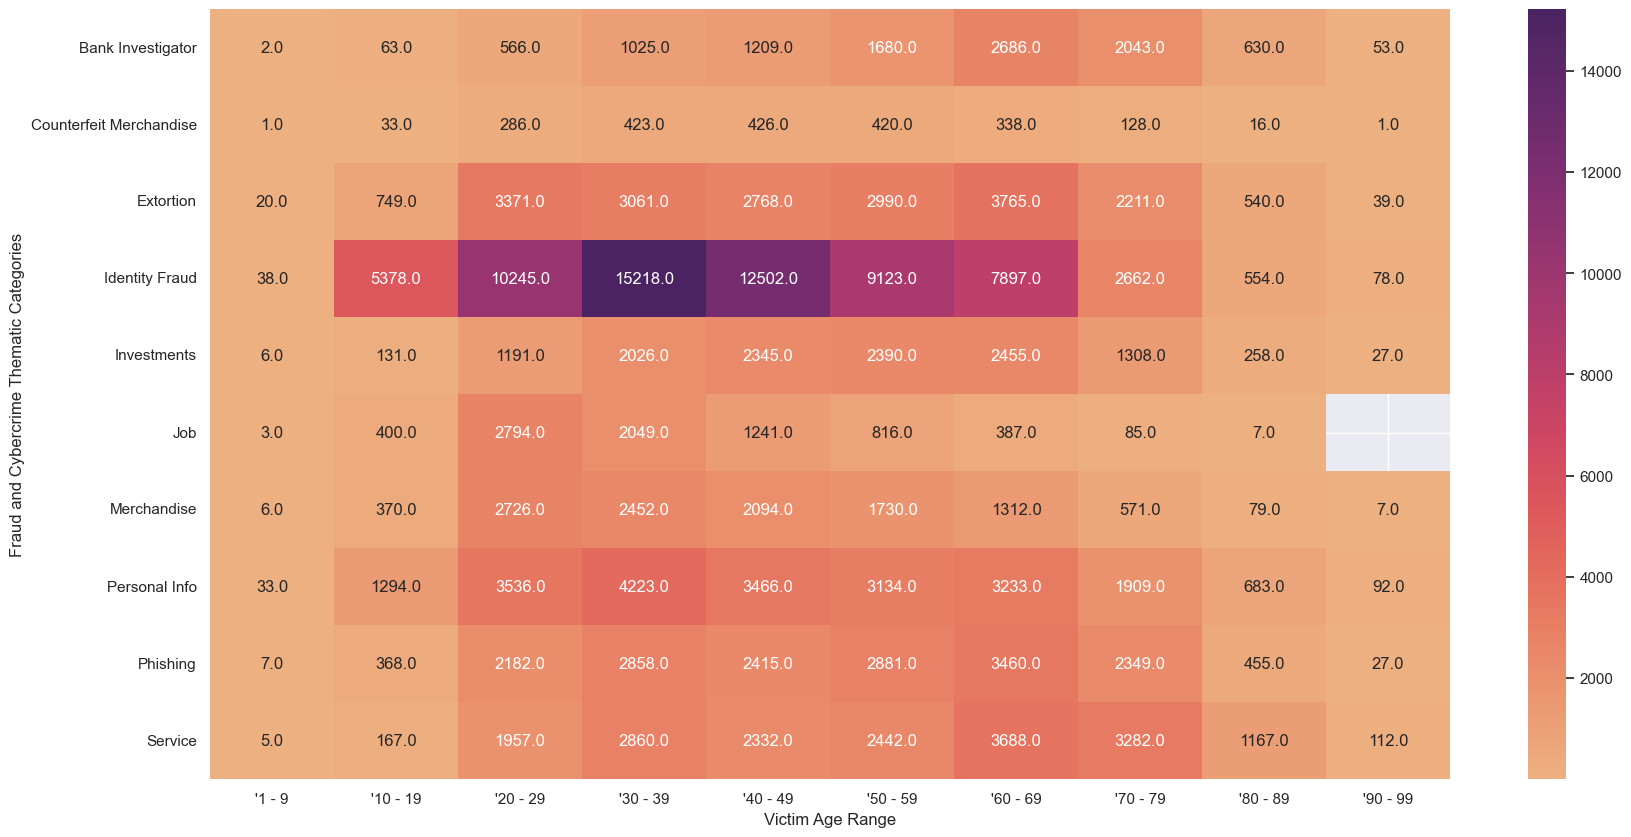

In [13]:
# Let's see what type of attack receives each group in a heatmap (Only for top 10)
top_10_frauds = set(df_clean['Fraud and Cybercrime Thematic Categories'].value_counts().nlargest(10).index)
filtered_df = df_clean[df_clean['Fraud and Cybercrime Thematic Categories'].isin(top_10_frauds)]

fraud_by_age = filtered_df.groupby(["Fraud and Cybercrime Thematic Categories", "Victim Age Range"]).size().reset_index(name = "Num_Cases")

fraud_by_age_pivoted = (fraud_by_age.pivot(
    index = "Fraud and Cybercrime Thematic Categories",
    columns= "Victim Age Range",
    values= "Num_Cases"))

f, ax = plt.subplots(figsize = (20, 10))
sns.heatmap(fraud_by_age_pivoted, annot = True, fmt = "", cmap = "flare" ,ax = ax)
plt.savefig("./figs/heatmap_cases.png")

**Notes:**
- As stated earlier, Identity fraud is the most common type of crime affecting mostly people in their 30s.
- Note also, how Investment Frauds, which on average had a loss associated of 60k, are more targeted to people above 30 up to 69. There can be multiple reasons behind this pattern, such as more income and more savings in those ranges, more interest in future investments, etc.
- Bank Investigator Fraud is worth mentioning, since we have all received a message from our bank claiming that a suspicious transaction is being carried out and they need for confirmation. As it can be observed, people above 60s are represent approximately 50% of the victims of this type of fraud. It can be due to the lack of awareness to this type of attack. 

It can be also interesting to explore these two variables based on economic losses. Let's do so.

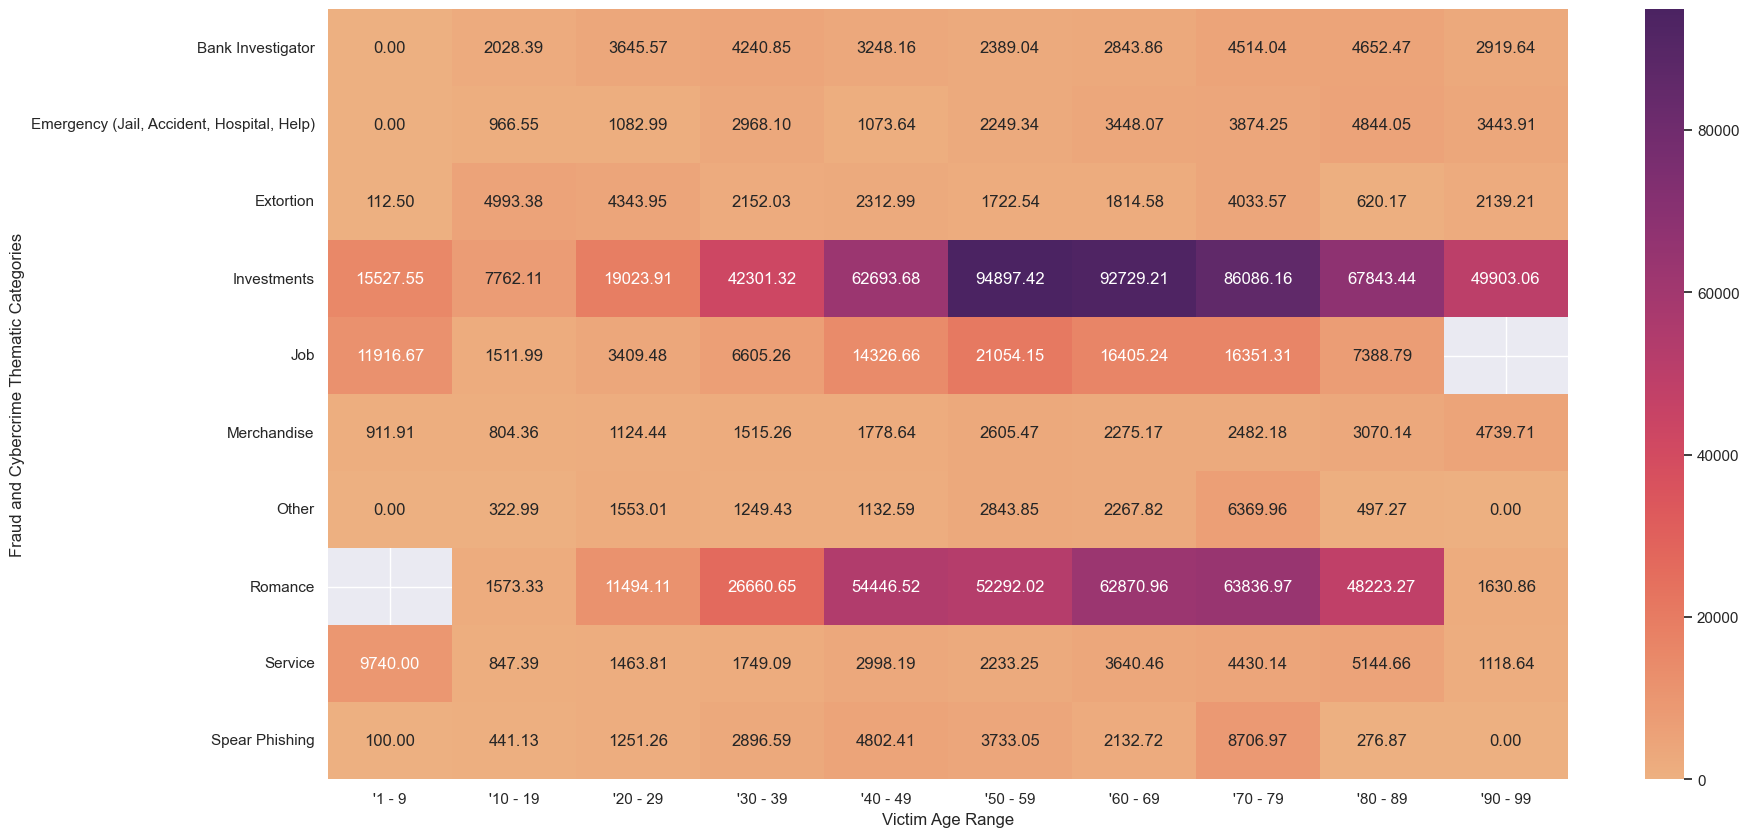

In [14]:
top_10_frauds_losses = set(df.groupby('Fraud and Cybercrime Thematic Categories')['Dollar Loss'].sum().sort_values(ascending=False).head(10).index)
filtered_df = df_clean[df_clean['Fraud and Cybercrime Thematic Categories'].isin(top_10_frauds_losses)]
losses_age_type = filtered_df.groupby(["Fraud and Cybercrime Thematic Categories", "Victim Age Range"])["Dollar Loss"].mean().reset_index(name = "Economic Loss")


pivoted = (losses_age_type.pivot(
    index = "Fraud and Cybercrime Thematic Categories",
    columns= "Victim Age Range",
    values= "Economic Loss"))

f, ax = plt.subplots(figsize = (20, 10))
sns.heatmap(pivoted, annot = True, fmt = ".2f", cmap = "flare" ,ax = ax)
plt.savefig("./figs/avg_losses_by_fraud_age.png")

**Notes:**
- The average dollar loss per fraud is notoriously higher for people avobe 50 years, reaching an average of 95k per fraud. These amounts can be their lifetime savings lost in seconds, and the leewy they have to recover may be not enough. 
- Romance Frauds are more frequent and expensive for people above 40s, however we see a huge jump in the 30s range. 
. Job shows also an interesting pattern, while people within their 20s is the most victimized group in terms of volumes, the average loss is higher for people above 40s.
- Oddly enough the average loss for Investment Frauds for people aged 1-9 is 15k. Service and Job also show same behaviour. Would require further investigation.

These patterns show a clear indication of correlation between disposable income and the average loss of the attack. People with greater savings/income tend to suffer more costly frauds, while people with less income or savings may suffer as well but with lower economic consequences. Nonetheless, this should be further investigated and tested.